# Chessboard Recognition



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


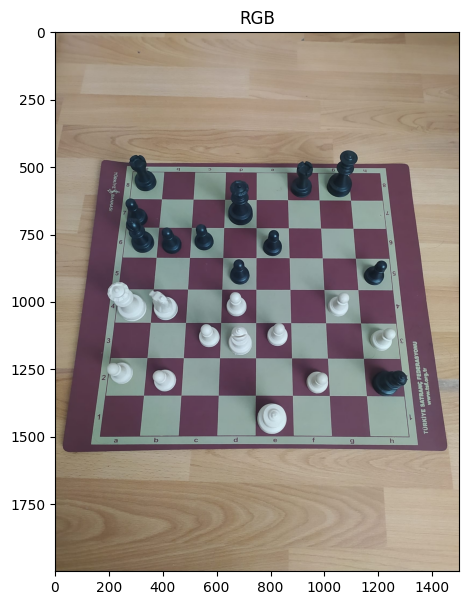

In [9]:
image = cv2.imread(r"../data/test-images/test-10.jpeg") # opencv reads images as BGR format

gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9,7))
plt.imshow(rgb_image)
plt.title("RGB");

## Processing the image

### Gaussian Blur, OTSU Thresholding, Canny Edge Detection, Dilation, Hough Transform

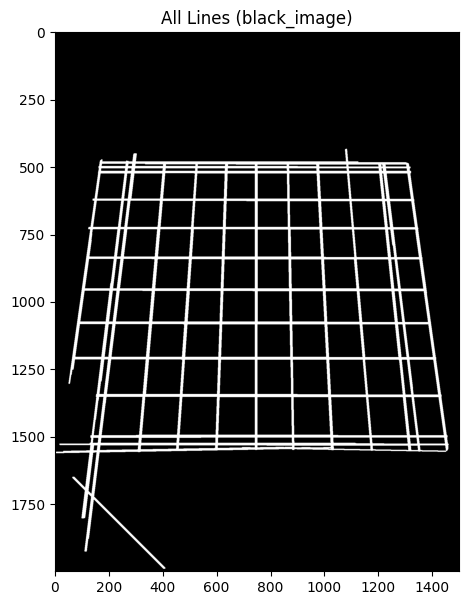

In [11]:
# Gaussian Blur (reduce noise)
gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),0)

# OTSU threshold (thresholding to binary)
ret, otsu_binary = cv2.threshold(gaussian_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Canny edge detection (edge detection)
canny_image = cv2.Canny(otsu_binary, 20, 255)

# Dilation (increase the thickness of the lines)
kernel = np.ones((7, 7), np.uint8)
dilation_image = cv2.dilate(canny_image, kernel, iterations=1)

# Hough Lines (find straight lines)
lines = cv2.HoughLinesP(dilation_image, 1, np.pi / 180, threshold=500, minLineLength=150, maxLineGap=100)


# Create an image that contains only black pixels
black_image = np.zeros_like(dilation_image)

# Draw only lines that are output of HoughLinesP function to the "black_image"
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # draw only lines to the "black_image"
        cv2.line(black_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Dilation
kernel = np.ones((3, 3), np.uint8)
black_image = cv2.dilate(black_image, kernel, iterations=1)

plt.figure(figsize=(9,7))
plt.title("All Lines (black_image)")
plt.imshow(black_image,cmap="gray");